# D: Random Numbers

In [1]:
# This notebook discusses aspects of random number generation including seeds.
# This program runs in about 1.58 seconds (Windows 10, 16 GB)
# This program runs in about 3.713 seconds on 5950X, 128GB

In [2]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch
from cloudmesh.common.Shell import Shell

In [3]:
StopWatch.progress(0)
StopWatch.start("total")
StopWatch.start("import")
import numpy as np
import matplotlib.pyplot as plt
import os
StopWatch.stop("import")

# cloudmesh status=running progress=0 pid=14164


In [4]:
def save(file):
  name = os.path.basename(file).replace(".py", "")
  cwd = Shell.map_filename(".")
  Shell.mkdir(f"{cwd}/images")
  plt.savefig(f'{cwd}/images/{name}.png',dpi=300)
  plt.savefig(f'{cwd}/images/{name}.pdf')
  plt.savefig(f'{cwd}/images/{name}.svg')
  plt.show()

## Part 1 Fixing Seed, fixes Random Numbers

Create two sets of random numbers with the same seed(1234567) and plot them
on top of each other. As identical sets of random numbers are created with
identical seeds, you will get two plots exactly on top of each other.

KeyError: 'HOME'

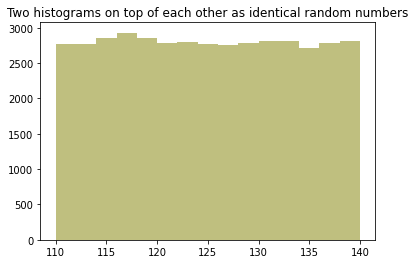

In [5]:
StopWatch.start("calculate")

n = 42000
seed = 1234567
# set the seed of the random number generator to 1234567
np.random.seed(seed=seed)
# generate n random numbers between 110 and 140
Base = 110 + 30* np.random.rand(n)

plt.figure("On Top of Each Other")
# Plot the histogram for the first set
plt.hist(Base, bins=15, range=(110, 140), alpha=0.5, color="blue")

# set the seed of the random number generator to 1234567 for the second set
np.random.seed(seed=seed)
# Generate the second set of random numbers
Base2 = 110 + 30 * np.random.rand(n)
plt.hist(Base2, bins=15, range=(110, 140), alpha=0.5, color="yellow")

# Plot the histogram for the second set
plt.title("Two histograms on top of each other as identical random numbers")
save("stacked-histograms-2")

## Part 2 Varying Seed (randomly) gives distinct results

Create two sets of random  numbers with different seeds and
plot them on top of each other. Differences can be seen in the plot.

In [ ]:
plt.figure("Different")
# set the seed of the random number generator to 1234567 for the first
# set of random numbers
np.random.seed(seed=seed)
# Generate a set of n random numbers between 110 and 140(first set)
Base4 = 110 + 30 * np.random.rand(n)
# plot histogram for the first set.
plt.hist(Base4, bins=15, range=(110, 140), alpha=0.5, color="blue")

# Generate the second set of n numbers between 110 and 140. Note that for this
# set the seed set will depend on where the first set ends.
Base1 = 110 + 30 * np.random.rand(n)

# Plot the histogram for the first seed set.
plt.hist(Base1, bins=15, range=(110, 140), alpha=0.5, color="green")
# Set the seed value for the generator to be 7654321
np.random.seed(seed=7654321)
# Generate the third set of n numbers between 110 and 140.
Base3 = 110 + 30 * np.random.rand(n)

# Plot the third set.
plt.hist(Base3, bins=15, range=(110, 140), alpha=0.5, color="red")
plt.title("Three distinct histograms as different random numbers")
# For Agg backend
save("stacked-histograms-3")
StopWatch.stop("calculate")

StopWatch.stop("total")
StopWatch.benchmark()
StopWatch.progress(100)